### Detecção da frequência de ressonância

In [34]:
# densidade linear fio grande
massafiogrande = 0.00395 #gramas
massafiogrande = massafiogrande / 1000 #kg
lfiogrande = 6 #cm
lfiogrande = lfiogrande / 100 #m
dens = massafiogrande / lfiogrande

# massa gancho 10 milímetros
lgancho = 10 # milímetros
lgancho = lgancho / 1000 #m
mgancho = dens * lgancho 
mgancho #kg

6.583333333333334e-07

In [35]:
#analizadorrede_comgancho = 29111 #hz
#ganchomedio = 32732 # hz
#massa = 0.00116  # gramas
#massa = massa / 1000  # converte a massa para kg
massa = mgancho
forca = massa * 9.8  # força peso (N) = massa x gravidade
forca = forca * 1e6 # converte força de Newtons para MicroNewtons
hertz = forca / 4.4
hertz * 1000

1466.287878787879

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import gpib
import visa
import import_ipynb
import config
from time import sleep
import numpy as np
import qcodes as qc
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id

importing Jupyter notebook from config.ipynb


In [2]:
# qcodes drivers
from qcodes.instrument_drivers.stanford_research.SR830 import SR830

In [3]:
# function generator and lock-in initialisation
sr830 = SR830('SR830', 'GPIB0::8::INSTR')
rm = visa.ResourceManager('@py')
ds345 = rm.open_resource('GPIB0::6::INSTR')

Connected to: Stanford_Research_Systems SR830 (serial:s/n86003, firmware:ver1.07) in 0.40s


In [27]:
# parameters 
function = 0
freqstart = 28000.000
freqstop = 33000.000
numpoints = 1501
amplitude = 4
time_constant = 0.03
sensitivity = 0.002

# write parameters in a text file    
config.save_parameters(function,freqstart,freqstop,numpoints,amplitude,time_constant,sensitivity)

In [28]:
# Instrument preparation

# DS345 Function Generator
ds345.write('FUNC %d' %function)
ds345.write('AMPL %f' %amplitude)
ds345.write('OFFS 0')
ds345.write('FREQ 32760.0')

# SR830
sr830.ch1_display('X')
sr830.ch2_display('Y')
sr830.time_constant(time_constant)
sr830.sensitivity(sensitivity)

In [29]:
tc = sr830.time_constant()
freq = []
x = []
y = []

In [30]:
# reading loop

for freqinst in np.linspace(freqstart,freqstop,numpoints):
    ds345.write('FREQ %f' % freqinst)
    sleep(tc)  # The SR830 does not wait by itself for the integration time to pass
    x.append(sr830.X())
    y.append(sr830.Y())
    freq.append(freqinst)

In [31]:
# save the applied frequencies and the values of X and Y.

np.savetxt('xlist.txt', x, fmt="%-5e")
np.savetxt('ylist.txt', y, fmt="%-5e")
np.savetxt('freqlist.txt', freq, fmt="%f")
x = np.loadtxt('xlist.txt')
y = np.loadtxt('ylist.txt')
freq = np.loadtxt('freqlist.txt')

<IPython.core.display.Javascript object>


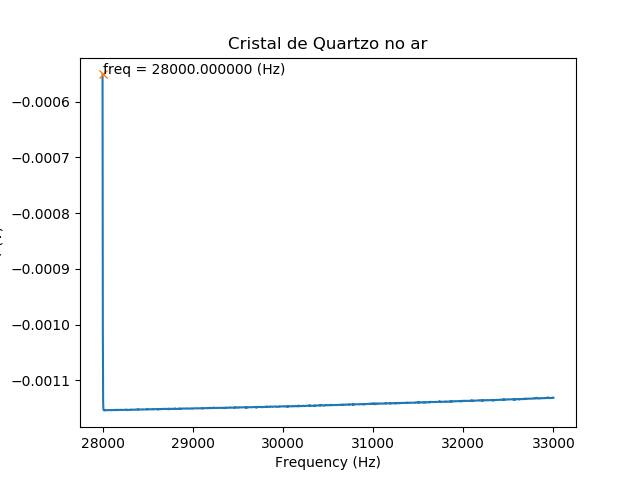

Text(0.5, 1.0, 'Cristal de Quartzo no ar')

In [32]:
# plots a graph of Y values and frequency range

max = y.argmax()
plt.plot(freq,y)
plt.plot(freq[max],y[max],'x')
plt.annotate('freq = %f (Hz)'%(freq[max]), xy=(freq[max], y[max]))

plt.xlabel('Frequency (Hz)')
plt.ylabel('Y (V)')
plt.title("Cristal de Quartzo no ar")

In [ ]:
# plots a graph of X values and frequency range

plt.figure()
max = x.argmax()
plt.plot(freq,x)
plt.plot(freq[max],x[max],'x')
plt.annotate('freq = %f (Hz)'%(freq[max]), xy=(freq[max], x[max]))

plt.xlabel('Frequency (Hz)')
plt.ylabel('X (V)')
plt.title("Cristal de Quartzo no ar")

In [14]:
sr830.sensitivity()

0.002